<a href="https://colab.research.google.com/github/AndresPautrat/PDI_UPC/blob/main/Histogramas_de_una_imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def normalized_histogram(image):
  H=np.zeros((256))
  #Recorrer la imagen y acuular los colores
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
      H[image[i,j]]+=1
  H=H/(image.shape[0]*image.shape[1])
  return H

In [ ]:
def equalize(image):
  h=normalized_histogram(image)
  
  A=np.zeros((256))
  A[0]=h[0]
  for i in range(1,256):
    A[i]=A[i-1]+h[i]
    #Recorrer la imagen y acualizar
    out=np.zeros(image.shape)
    for i in range (0,image.shape[0]):
      for j in range(0,image.shape[1]):
        out[i,j]=A[image[i,j]]
  return (255*out).astype('uint8')

In [ ]:
im=cv2.imread('cameraman.tif',0)
im2=cv2.imread('cameraman.tif',0)

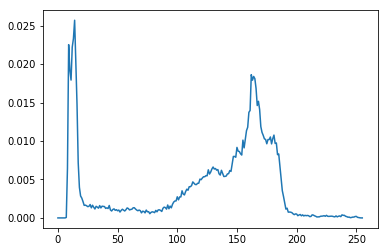

In [ ]:
h=normalized_histogram(im)
plt.plot(h)
plt.show()

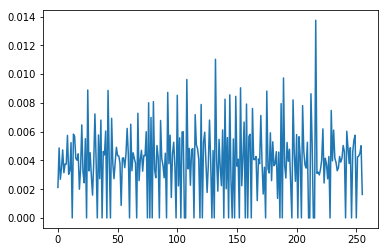

In [ ]:
out=normalized_histogram(equalize(im))
plt.plot(out)
plt.show()

In [ ]:
for i in range(8):
  for j in range(8):
    im2[i*32:(i+1)*32,j*32:(j+1)*32]=equalize(im[i*32:(i+1)*32,j*32:(j+1)*32])
    

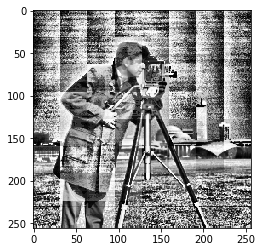

In [ ]:
plt.imshow(im2,cmap='gray')
plt.show()